### 1. Data Description  <a id='dd'>

The dataset describes diagnosing of cardiac Single Proton Emission Computed Tomography (SPECT) images.
   Each of the patients is classified into two categories: normal and abnormal.
   The database of 267 SPECT image sets (patients) was processed to extract features that summarize the original SPECT images.
   As a result, 44 continuous feature pattern was created for each patient.
   
   1.   OVERALL_DIAGNOSIS: 0,1 (class attribute, binary)
   2.   F1R:   continuous (count in ROI (region of interest) 1 in rest)
   3.   F1S:   continuous (count in ROI 1 in stress)
   4.   F2R:   continuous (count in ROI 2 in rest)
   5.   F2S:   continuous (count in ROI 2 in stress)
   6.   F3R:   continuous (count in ROI 3 in rest)
   7.   F3S:   continuous (count in ROI 3 in stress)
   8.   F4R:   continuous (count in ROI 4 in rest)
   9.   F4S:   continuous (count in ROI 4 in stress)
   10.  F5R:   continuous (count in ROI 5 in rest)
   11.  F5S:   continuous (count in ROI 5 in stress)
   12.  F6R:   continuous (count in ROI 6 in rest)
   13.  F6S:   continuous (count in ROI 6 in stress)
   14.  F7R:   continuous (count in ROI 7 in rest)
   15.  F7S:   continuous (count in ROI 7 in stress)
   16.  F8R:   continuous (count in ROI 8 in rest)
   17.  F8S:   continuous (count in ROI 8 in stress)
   18.  F9R:   continuous (count in ROI 9 in rest)
   19.  F9S:   continuous (count in ROI 9 in stress)
   20.  F10R:  continuous (count in ROI 10 in rest)
   21.  F10S:  continuous (count in ROI 10 in stress)
   22.  F11R:  continuous (count in ROI 11 in rest)
   23.  F11S:  continuous (count in ROI 11 in stress)
   24.  F12R:  continuous (count in ROI 12 in rest)
   25.  F12S:  continuous (count in ROI 12 in stress)
   26.  F13R:  continuous (count in ROI 13 in rest)
   27.  F13S:  continuous (count in ROI 13 in stress)
   28.  F14R:  continuous (count in ROI 14 in rest)
   29.  F14S:  continuous (count in ROI 14 in stress)
   30.  F15R:  continuous (count in ROI 15 in rest)
   31.  F15S:  continuous (count in ROI 15 in stress)
   32.  F16R:  continuous (count in ROI 16 in rest)
   33.  F16S:  continuous (count in ROI 16 in stress)
   34.  F17R:  continuous (count in ROI 17 in rest)
   35.  F17S:  continuous (count in ROI 17 in stress)
   36.  F18R:  continuous (count in ROI 18 in rest)
   37.  F18S:  continuous (count in ROI 18 in stress)
   38.  F19R:  continuous (count in ROI 19 in rest)
   39.  F19S:  continuous (count in ROI 19 in stress)
   40.  F20R:  continuous (count in ROI 20 in rest)
   41.  F20S:  continuous (count in ROI 20 in stress)
   42.  F21R:  continuous (count in ROI 21 in rest)
   43.  F21S:  continuous (count in ROI 21 in stress)
   44.  F22R:  continuous (count in ROI 22 in rest)
   45.  F22S:  continuous (count in ROI 22 in stress)
   
   ** Objective **
   
   Our goal is to predict whether the SPECT images are normal or not.

In [1]:
# Imports 
import pandas as pd
import numpy as np
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
import sys
%matplotlib inline
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# Loading the Test data

# url = 'https://query.data.world/s/cuqtpuoewpxysusrt5z4igihjah4xo'
filepath = r"C:\Users\xsmaddurve\Downloads\Chaitanya_Pratice\KMeans\\"
col_names = ['target','F1R', 'F1S', 'F2R', 'F2S', 'F3R', 'F3S', 'F4R', 'F4S', 'F5R','F5S','F6R','F6S','F7R','F7S','F8R','F8S','F9R','F9S','F10R',
    'F10S',  'F11R','F11S','F12R','F12S','F13R','F13S','F14R','F14S','F15R','F15S','F16R','F16S','F17R','F17S','F18R','F18S','F19R','F19S',   'F20R',
    'F20S','F21R','F21S','F22R','F22S']
# spectf_test= pd.read_csv(url,sep=',',names=col_names)
spectf_test= pd.read_csv(filepath+"SPECTF_test.csv",sep=',',names=col_names)
spectf_test.head()

,target,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,...,F18R,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S
0,1,67,68,73,78,65,63,67,60,63,...,61,56,76,75,74,77,76,74,59,68
1,1,75,74,71,71,62,58,70,64,71,...,66,62,68,69,69,66,64,58,57,52
2,1,83,64,66,67,67,74,74,72,64,...,67,64,69,63,68,54,65,64,43,42
3,1,72,66,65,65,64,61,71,78,73,...,69,68,68,63,71,72,65,63,58,60
4,1,62,60,69,61,63,63,70,68,70,...,66,66,58,56,72,73,71,64,49,42


In [4]:
# Loading the Test data

# url = 'https://query.data.world/s/ksxft7lhmbxpihskwsngwhpuul6lye'
col_names = ['target','F1R', 'F1S', 'F2R', 'F2S', 'F3R', 'F3S', 'F4R', 'F4S', 'F5R','F5S','F6R','F6S','F7R','F7S','F8R','F8S','F9R','F9S','F10R',
    'F10S',  'F11R','F11S','F12R','F12S','F13R','F13S','F14R','F14S','F15R','F15S','F16R','F16S','F17R','F17S','F18R','F18S','F19R','F19S',   'F20R',
    'F20S','F21R','F21S','F22R','F22S']
spectf_df= pd.read_csv(filepath+"SPECTF_test.csv",sep=',',names=col_names)

In [5]:
spectf_df.shape

(187, 45)

In [6]:
spectf_df.head()

,target,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,...,F18R,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S
0,1,67,68,73,78,65,63,67,60,63,...,61,56,76,75,74,77,76,74,59,68
1,1,75,74,71,71,62,58,70,64,71,...,66,62,68,69,69,66,64,58,57,52
2,1,83,64,66,67,67,74,74,72,64,...,67,64,69,63,68,54,65,64,43,42
3,1,72,66,65,65,64,61,71,78,73,...,69,68,68,63,71,72,65,63,58,60
4,1,62,60,69,61,63,63,70,68,70,...,66,66,58,56,72,73,71,64,49,42


In [7]:
spectf_df.tail()

,target,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,...,F18R,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S
182,0,74,69,75,70,70,74,77,77,65,...,66,67,63,61,71,68,66,65,54,57
183,0,72,61,64,66,64,59,68,66,76,...,69,64,67,71,69,68,65,73,56,52
184,0,75,73,72,77,68,67,76,73,67,...,70,67,72,71,79,75,77,75,67,71
185,0,59,62,72,74,66,66,74,76,63,...,65,71,67,69,77,78,77,76,70,70
186,0,64,66,68,71,62,64,74,73,63,...,70,69,68,65,75,72,62,64,57,54


In [8]:
spectf_df.sample(5)

,target,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,...,F18R,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S
83,1,68,70,70,69,65,63,71,74,73,...,67,69,69,66,62,64,68,60,56,51
127,1,74,76,72,74,70,71,73,77,70,...,69,72,62,67,71,75,61,62,49,51
50,1,77,63,68,70,66,70,80,79,60,...,69,71,56,53,74,76,72,73,64,63
134,1,73,62,69,70,73,67,76,77,72,...,65,66,71,64,70,61,72,67,58,59
133,1,42,51,72,56,72,67,58,54,56,...,63,64,58,72,51,54,60,55,39,45


In [9]:
spectf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 45 columns):
target    187 non-null int64
F1R       187 non-null int64
F1S       187 non-null int64
F2R       187 non-null int64
F2S       187 non-null int64
F3R       187 non-null int64
F3S       187 non-null int64
F4R       187 non-null int64
F4S       187 non-null int64
F5R       187 non-null int64
F5S       187 non-null int64
F6R       187 non-null int64
F6S       187 non-null int64
F7R       187 non-null int64
F7S       187 non-null int64
F8R       187 non-null int64
F8S       187 non-null int64
F9R       187 non-null int64
F9S       187 non-null int64
F10R      187 non-null int64
F10S      187 non-null int64
F11R      187 non-null int64
F11S      187 non-null int64
F12R      187 non-null int64
F12S      187 non-null int64
F13R      187 non-null int64
F13S      187 non-null int64
F14R      187 non-null int64
F14S      187 non-null int64
F15R      187 non-null int64
F15S      187 non-null in

In [10]:
spectf_df.describe()

,target,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,...,F18R,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,...,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,0.919786,65.128342,63.786096,68.304813,68.320856,63.818182,62.374332,69.352941,68.534759,62.839572,...,63.358289,61.695187,65.090909,63.850267,64.390374,62.187166,60.770053,58.406417,51.128342,48.593583
std,0.272353,8.961963,10.157746,6.849231,9.046697,9.569165,10.069062,9.513631,10.614082,9.604879,...,8.673589,12.025874,7.980977,9.171545,13.241857,13.691778,15.516746,16.194568,13.350712,15.087756
min,0.000000,23.000000,21.000000,38.000000,34.000000,21.000000,25.000000,21.000000,20.000000,12.000000,...,18.000000,14.000000,33.000000,18.000000,11.000000,6.000000,5.000000,8.000000,13.000000,4.000000
25%,1.000000,61.000000,58.500000,64.000000,65.000000,60.000000,59.000000,67.000000,66.000000,60.500000,...,61.500000,60.000000,60.500000,59.000000,61.000000,58.000000,55.500000,53.500000,44.000000,42.000000
50%,1.000000,66.000000,65.000000,69.000000,70.000000,65.000000,64.000000,71.000000,71.000000,65.000000,...,66.000000,65.000000,66.000000,66.000000,68.000000,66.000000,66.000000,63.000000,55.000000,52.000000
75%,1.000000,71.000000,70.000000,73.000000,74.000000,70.000000,69.000000,75.000000,75.000000,68.000000,...,69.000000,69.000000,70.000000,70.000000,73.000000,71.000000,72.000000,69.000000,60.000000,60.000000
max,1.000000,83.000000,80.000000,82.000000,84.000000,82.000000,79.000000,85.000000,81.000000,76.000000,...,76.000000,77.000000,80.000000,79.000000,81.000000,81.000000,82.000000,82.000000,82.000000,71.000000


In [11]:
spectf_df.isna().sum()

target    0
F1R       0
F1S       0
F2R       0
F2S       0
F3R       0
F3S       0
F4R       0
F4S       0
F5R       0
F5S       0
F6R       0
F6S       0
F7R       0
F7S       0
F8R       0
F8S       0
F9R       0
F9S       0
F10R      0
F10S      0
F11R      0
F11S      0
F12R      0
F12S      0
F13R      0
F13S      0
F14R      0
F14S      0
F15R      0
F15S      0
F16R      0
F16S      0
F17R      0
F17S      0
F18R      0
F18S      0
F19R      0
F19S      0
F20R      0
F20S      0
F21R      0
F21S      0
F22R      0
F22S      0
dtype: int64

In [12]:
#custom designed function
def var_summary(df):
    '''
    To different statistical metrics from a given data set
    '''
    index_df = ["Count", 'Sum', "Mean", "Median", "Std", "Min",  "P1", "P5", "P10", "P25", "P50", "P75", "P90", "P95", "P99", "P99.5", "Max"]
    values = [df.count(), df.sum(), df.mean(), df.median(), df.std(), df.min(),  df.quantile(0.01, axis = 0) , df.quantile(0.05, axis = 0),
              df.quantile(0.1, axis = 0),df.quantile(0.25, axis = 0), df.quantile(0.5, axis = 0), df.quantile(0.75, axis = 0), df.quantile(0.9, axis = 0), df.quantile(0.95, axis = 0),
              df.quantile(0.99, axis = 0), df.quantile(0.995, axis = 0), df.max() ]    
    new_df = pd.DataFrame(values, index = index_df, columns = df.columns)
    return new_df

In [13]:
var_summary(spectf_df)

,target,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,...,F18R,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S
Count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,...,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
Sum,172.000000,12179.000000,11928.000000,12773.000000,12776.000000,11934.000000,11664.000000,12969.000000,12816.000000,11751.000000,...,11848.000000,11537.000000,12172.000000,11940.000000,12041.000000,11629.000000,11364.000000,10922.000000,9561.000000,9087.000000
Mean,0.919786,65.128342,63.786096,68.304813,68.320856,63.818182,62.374332,69.352941,68.534759,62.839572,...,63.358289,61.695187,65.090909,63.850267,64.390374,62.187166,60.770053,58.406417,51.128342,48.593583
Median,1.000000,66.000000,65.000000,69.000000,70.000000,65.000000,64.000000,71.000000,71.000000,65.000000,...,66.000000,65.000000,66.000000,66.000000,68.000000,66.000000,66.000000,63.000000,55.000000,52.000000
Std,0.272353,8.961963,10.157746,6.849231,9.046697,9.569165,10.069062,9.513631,10.614082,9.604879,...,8.673589,12.025874,7.980977,9.171545,13.241857,13.691778,15.516746,16.194568,13.350712,15.087756
Min,0.000000,23.000000,21.000000,38.000000,34.000000,21.000000,25.000000,21.000000,20.000000,12.000000,...,18.000000,14.000000,33.000000,18.000000,11.000000,6.000000,5.000000,8.000000,13.000000,4.000000
P1,0.000000,32.860000,28.160000,47.720000,39.300000,30.880000,27.720000,29.440000,24.720000,24.600000,...,33.580000,19.720000,40.300000,35.160000,18.720000,12.000000,13.860000,9.000000,13.000000,9.860000
P5,0.000000,49.600000,46.300000,56.300000,50.300000,44.300000,41.600000,54.000000,46.900000,44.000000,...,42.300000,31.000000,51.000000,47.300000,36.000000,36.200000,28.000000,22.200000,24.000000,17.000000
P10,1.000000,55.600000,51.000000,60.000000,55.600000,54.600000,48.600000,58.000000,54.600000,54.000000,...,52.200000,44.800000,54.600000,53.000000,47.600000,45.600000,38.600000,33.400000,29.600000,22.000000
P25,1.000000,61.000000,58.500000,64.000000,65.000000,60.000000,59.000000,67.000000,66.000000,60.500000,...,61.500000,60.000000,60.500000,59.000000,61.000000,58.000000,55.500000,53.500000,44.000000,42.000000


In [14]:
spectf_test.shape

(187, 45)

In [15]:
spectf_test.head()

,target,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,...,F18R,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S
0,1,67,68,73,78,65,63,67,60,63,...,61,56,76,75,74,77,76,74,59,68
1,1,75,74,71,71,62,58,70,64,71,...,66,62,68,69,69,66,64,58,57,52
2,1,83,64,66,67,67,74,74,72,64,...,67,64,69,63,68,54,65,64,43,42
3,1,72,66,65,65,64,61,71,78,73,...,69,68,68,63,71,72,65,63,58,60
4,1,62,60,69,61,63,63,70,68,70,...,66,66,58,56,72,73,71,64,49,42


In [16]:
spectf_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 45 columns):
target    187 non-null int64
F1R       187 non-null int64
F1S       187 non-null int64
F2R       187 non-null int64
F2S       187 non-null int64
F3R       187 non-null int64
F3S       187 non-null int64
F4R       187 non-null int64
F4S       187 non-null int64
F5R       187 non-null int64
F5S       187 non-null int64
F6R       187 non-null int64
F6S       187 non-null int64
F7R       187 non-null int64
F7S       187 non-null int64
F8R       187 non-null int64
F8S       187 non-null int64
F9R       187 non-null int64
F9S       187 non-null int64
F10R      187 non-null int64
F10S      187 non-null int64
F11R      187 non-null int64
F11S      187 non-null int64
F12R      187 non-null int64
F12S      187 non-null int64
F13R      187 non-null int64
F13S      187 non-null int64
F14R      187 non-null int64
F14S      187 non-null int64
F15R      187 non-null int64
F15S      187 non-null in

In [17]:
spectf_test.describe()

,target,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,...,F18R,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,...,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,0.919786,65.128342,63.786096,68.304813,68.320856,63.818182,62.374332,69.352941,68.534759,62.839572,...,63.358289,61.695187,65.090909,63.850267,64.390374,62.187166,60.770053,58.406417,51.128342,48.593583
std,0.272353,8.961963,10.157746,6.849231,9.046697,9.569165,10.069062,9.513631,10.614082,9.604879,...,8.673589,12.025874,7.980977,9.171545,13.241857,13.691778,15.516746,16.194568,13.350712,15.087756
min,0.000000,23.000000,21.000000,38.000000,34.000000,21.000000,25.000000,21.000000,20.000000,12.000000,...,18.000000,14.000000,33.000000,18.000000,11.000000,6.000000,5.000000,8.000000,13.000000,4.000000
25%,1.000000,61.000000,58.500000,64.000000,65.000000,60.000000,59.000000,67.000000,66.000000,60.500000,...,61.500000,60.000000,60.500000,59.000000,61.000000,58.000000,55.500000,53.500000,44.000000,42.000000
50%,1.000000,66.000000,65.000000,69.000000,70.000000,65.000000,64.000000,71.000000,71.000000,65.000000,...,66.000000,65.000000,66.000000,66.000000,68.000000,66.000000,66.000000,63.000000,55.000000,52.000000
75%,1.000000,71.000000,70.000000,73.000000,74.000000,70.000000,69.000000,75.000000,75.000000,68.000000,...,69.000000,69.000000,70.000000,70.000000,73.000000,71.000000,72.000000,69.000000,60.000000,60.000000
max,1.000000,83.000000,80.000000,82.000000,84.000000,82.000000,79.000000,85.000000,81.000000,76.000000,...,76.000000,77.000000,80.000000,79.000000,81.000000,81.000000,82.000000,82.000000,82.000000,71.000000


In [18]:
var_summary(spectf_test)

,target,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,...,F18R,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S
Count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,...,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
Sum,172.000000,12179.000000,11928.000000,12773.000000,12776.000000,11934.000000,11664.000000,12969.000000,12816.000000,11751.000000,...,11848.000000,11537.000000,12172.000000,11940.000000,12041.000000,11629.000000,11364.000000,10922.000000,9561.000000,9087.000000
Mean,0.919786,65.128342,63.786096,68.304813,68.320856,63.818182,62.374332,69.352941,68.534759,62.839572,...,63.358289,61.695187,65.090909,63.850267,64.390374,62.187166,60.770053,58.406417,51.128342,48.593583
Median,1.000000,66.000000,65.000000,69.000000,70.000000,65.000000,64.000000,71.000000,71.000000,65.000000,...,66.000000,65.000000,66.000000,66.000000,68.000000,66.000000,66.000000,63.000000,55.000000,52.000000
Std,0.272353,8.961963,10.157746,6.849231,9.046697,9.569165,10.069062,9.513631,10.614082,9.604879,...,8.673589,12.025874,7.980977,9.171545,13.241857,13.691778,15.516746,16.194568,13.350712,15.087756
Min,0.000000,23.000000,21.000000,38.000000,34.000000,21.000000,25.000000,21.000000,20.000000,12.000000,...,18.000000,14.000000,33.000000,18.000000,11.000000,6.000000,5.000000,8.000000,13.000000,4.000000
P1,0.000000,32.860000,28.160000,47.720000,39.300000,30.880000,27.720000,29.440000,24.720000,24.600000,...,33.580000,19.720000,40.300000,35.160000,18.720000,12.000000,13.860000,9.000000,13.000000,9.860000
P5,0.000000,49.600000,46.300000,56.300000,50.300000,44.300000,41.600000,54.000000,46.900000,44.000000,...,42.300000,31.000000,51.000000,47.300000,36.000000,36.200000,28.000000,22.200000,24.000000,17.000000
P10,1.000000,55.600000,51.000000,60.000000,55.600000,54.600000,48.600000,58.000000,54.600000,54.000000,...,52.200000,44.800000,54.600000,53.000000,47.600000,45.600000,38.600000,33.400000,29.600000,22.000000
P25,1.000000,61.000000,58.500000,64.000000,65.000000,60.000000,59.000000,67.000000,66.000000,60.500000,...,61.500000,60.000000,60.500000,59.000000,61.000000,58.000000,55.500000,53.500000,44.000000,42.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022B206B2B38>,
      dtype=object)

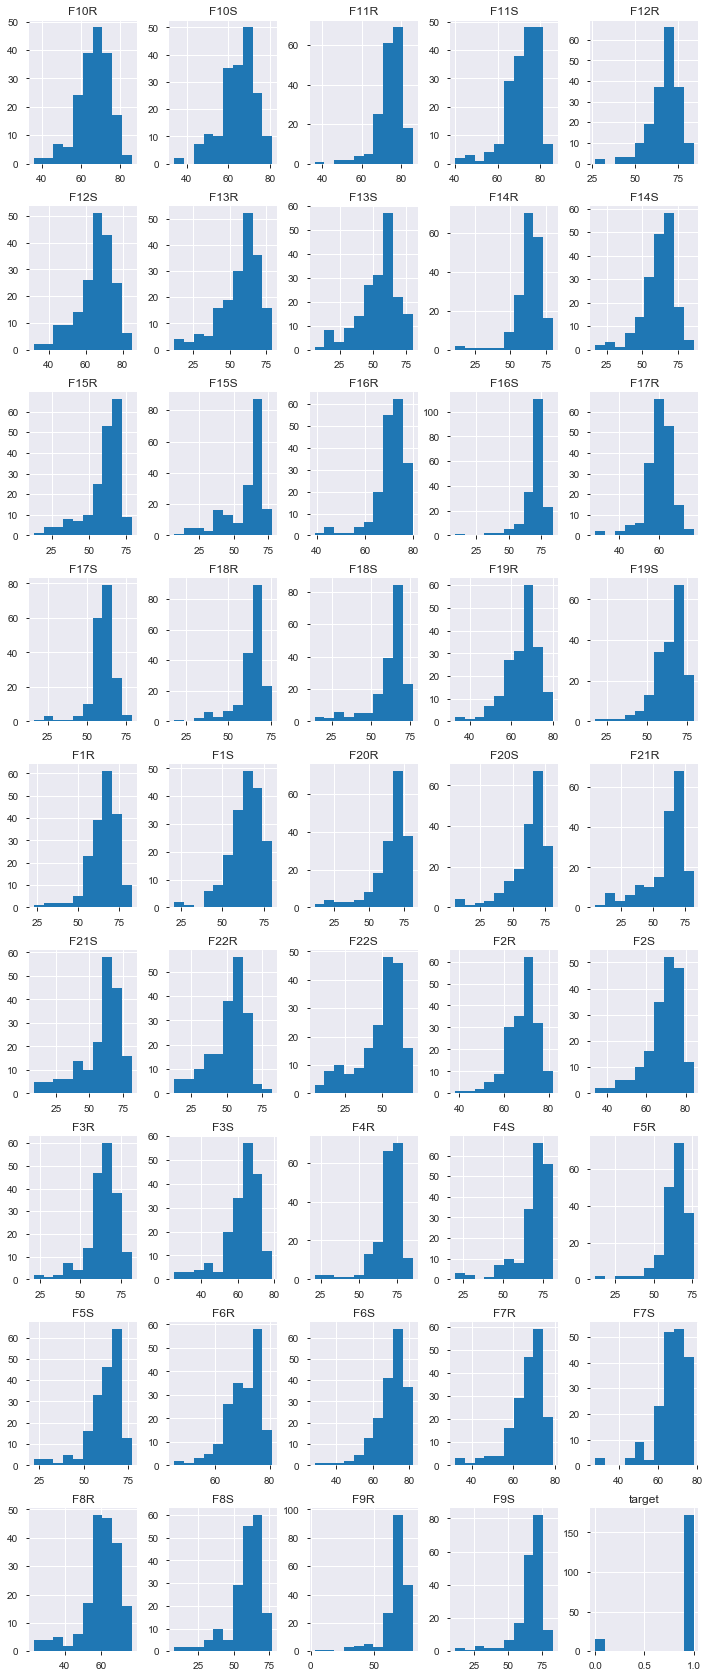

In [19]:
spectf_df.hist(bins=10, figsize=(12,30), layout=(9,5))
plt.show()

In [20]:
spectf_df_corre = spectf_df.corr()
spectf_df_corre

,target,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,...,F18R,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S
target,1.000000,-0.033205,-0.072310,-0.047347,-0.100783,-0.162407,-0.218370,-0.084463,-0.117129,-0.109763,...,-0.103840,-0.122409,-0.060936,-0.069405,-0.158235,-0.180498,-0.201578,-0.233921,-0.224858,-0.213390
F1R,-0.033205,1.000000,0.601643,0.380365,0.376806,0.184712,0.208528,0.599774,0.424983,0.549938,...,0.422417,0.330402,0.317041,0.255071,0.451074,0.327409,0.089097,0.097360,0.021205,0.050646
F1S,-0.072310,0.601643,1.000000,0.271874,0.455517,0.055241,0.317336,0.415818,0.519327,0.455041,...,0.377079,0.418680,0.299668,0.517828,0.396013,0.488027,0.088510,0.073545,0.016101,0.083307
F2R,-0.047347,0.380365,0.271874,1.000000,0.601705,0.166304,0.149028,0.300404,0.141069,0.246003,...,0.188291,0.139054,0.287469,0.195695,0.288137,0.223436,0.147974,0.116902,0.057365,0.084343
F2S,-0.100783,0.376806,0.455517,0.601705,1.000000,0.094517,0.226083,0.239487,0.233756,0.310953,...,0.178453,0.202181,0.155147,0.309793,0.263244,0.379087,0.137220,0.169305,0.103953,0.129407
F3R,-0.162407,0.184712,0.055241,0.166304,0.094517,1.000000,0.710749,0.262919,0.394523,0.231966,...,0.349090,0.299781,-0.022380,-0.110333,0.367660,0.225666,0.503053,0.464465,0.421015,0.398157
F3S,-0.218370,0.208528,0.317336,0.149028,0.226083,0.710749,1.000000,0.350626,0.656415,0.251063,...,0.483734,0.581697,0.020715,0.096611,0.455714,0.473037,0.638465,0.695800,0.491006,0.594700
F4R,-0.084463,0.599774,0.415818,0.300404,0.239487,0.262919,0.350626,1.000000,0.679731,0.595992,...,0.676583,0.551457,0.428249,0.254531,0.644387,0.468698,0.213282,0.228189,0.079135,0.160490
F4S,-0.117129,0.424983,0.519327,0.141069,0.233756,0.394523,0.656415,0.679731,1.000000,0.379337,...,0.701032,0.764119,0.210451,0.310271,0.663214,0.641950,0.429595,0.433020,0.277691,0.354779
F5R,-0.109763,0.549938,0.455041,0.246003,0.310953,0.231966,0.251063,0.595992,0.379337,1.000000,...,0.544854,0.423605,0.462315,0.368660,0.501115,0.367761,0.201297,0.167055,0.082002,0.133144


<Figure size 1440x720 with 0 Axes>

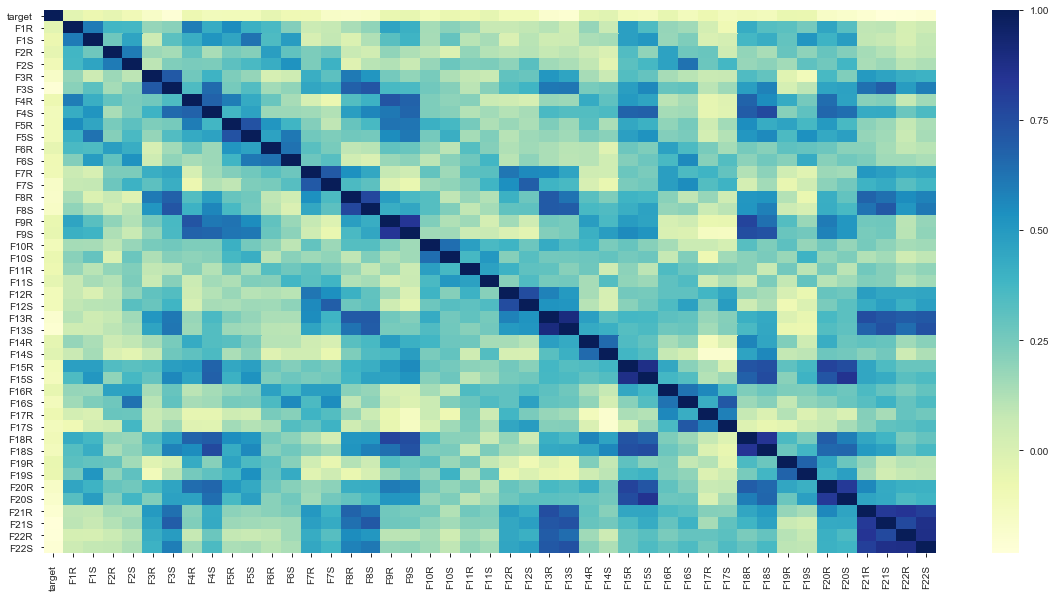

In [21]:
plt.figure(figsize=(20,10))
sns.heatmap(spectf_df_corre, annot=False,  cmap="YlGnBu")

In [22]:
# custom designed function
def extract_x_columns(df_y):
    X = df_y[df_y.between(0.1,0.8)].index        
    X = X.append(df_y[df_y.between(-0.8,-0.1)].index)    
    return X

In [23]:
x_columns = extract_x_columns(spectf_df_corre['target'])
x_columns

Index(['F2S', 'F3R', 'F3S', 'F4S', 'F5R', 'F5S', 'F7S', 'F8R', 'F8S', 'F10R',
       'F12R', 'F12S', 'F13R', 'F13S', 'F15R', 'F15S', 'F16S', 'F17S', 'F18R',
       'F18S', 'F20R', 'F20S', 'F21R', 'F21S', 'F22R', 'F22S'],
      dtype='object')

# Logistic Regression  without applying scaling

In [24]:
Y = spectf_df['target']
X = spectf_df[x_columns]

In [26]:
y_train = spectf_df['target']
x_train = spectf_df[x_columns]
x_test = spectf_test[x_columns]
y_test = spectf_test['target']

In [27]:
y_train.shape
x_train.shape
x_test.shape
y_test.shape

(187,)

(187, 26)

(187, 26)

(187,)

In [28]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [29]:
lr = lr.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [30]:
y_predict = lr.predict(x_test)

In [31]:
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [32]:
metrics.accuracy_score(y_test, y_predict)

0.9090909090909091

In [33]:
print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.92      0.99      0.95       172

   micro avg       0.91      0.91      0.91       187
   macro avg       0.46      0.49      0.48       187
weighted avg       0.85      0.91      0.88       187



In [34]:
print(metrics.confusion_matrix(y_test,y_predict))

[[  0  15]
 [  2 170]]


# PCA

In [39]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
spectf_test_nor = scalar.fit_transform(spectf_test)
spectf_df_nor = scalar.fit_transform(spectf_df)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [44]:
print(spectf_test_nor)
print(spectf_df_nor)

[[ 0.29531221  0.20940529  0.41596002 ...  0.96547463  0.59118869
   1.28968911]
 [ 0.29531221  1.10446332  1.00822796 ... -0.02516326  0.44098178
   0.22637971]
 [ 0.29531221  1.99952135  0.02111472 ...  0.34632595 -0.61046658
  -0.43818867]
 ...
 [-3.38624669  1.10446332  0.90951664 ...  1.0273895   1.19201632
   1.48905963]
 [-3.38624669 -0.68565274 -0.17630793 ...  1.08930437  1.41732668
   1.42260279]
 [-3.38624669 -0.12624147  0.21853737 ...  0.34632595  0.44098178
   0.35929338]]
[[ 0.29531221  0.20940529  0.41596002 ...  0.96547463  0.59118869
   1.28968911]
 [ 0.29531221  1.10446332  1.00822796 ... -0.02516326  0.44098178
   0.22637971]
 [ 0.29531221  1.99952135  0.02111472 ...  0.34632595 -0.61046658
  -0.43818867]
 ...
 [-3.38624669  1.10446332  0.90951664 ...  1.0273895   1.19201632
   1.48905963]
 [-3.38624669 -0.68565274 -0.17630793 ...  1.08930437  1.41732668
   1.42260279]
 [-3.38624669 -0.12624147  0.21853737 ...  0.34632595  0.44098178
   0.35929338]]


In [47]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(spectf_df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [59]:
## Minimum number of components for which the variance is 90% is 16
pca.explained_variance_ratio_[:16].sum()

0.9082141194028243

Text(0.5, 0, 'Number of components')

Text(0, 0.5, 'Cumulative explained variance')

Text(16, 0.91, 'X')

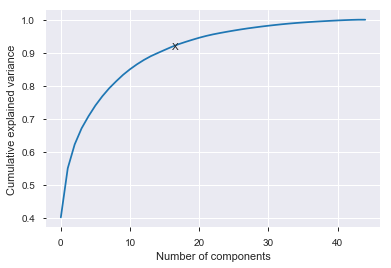

In [65]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.annotate('X',xy=(16, .91))
plt.show()

In [89]:
x_pca = PCA(n_components=16)
spect_df_pca = x_pca.fit_transform(spectf_df_nor) 
spect_test_pca = x_pca.fit_transform(spectf_test_nor)

In [91]:
spect_df_pca

array([[-2.81576809,  2.03336255, -1.50423499, ..., -0.70416806,
         0.27188766, -0.26540631],
       [-2.00668225, -0.19614764, -1.38643578, ...,  0.53862273,
         0.85300778, -0.21146171],
       [-2.2347494 ,  0.60417001, -1.18165312, ...,  0.65267118,
         0.5848375 , -1.22908256],
       ...,
       [-4.42439608,  0.37856638, -0.46515819, ...,  0.14130529,
         0.5181701 , -0.87309496],
       [-3.25065603,  1.17989582,  0.54884476, ..., -0.96191983,
         0.30579839,  0.58140452],
       [-3.14776734,  0.46442399, -0.20922374, ..., -0.23318315,
         0.90928469, -0.54720151]])

In [95]:
spect_df_pca_cor = pd.DataFrame(spect_df_pca).corr()
spect_test_pca_corr = pd.DataFrame(spect_test_pca).corr()

In [102]:
spect_df_pca_cor

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.000000e+00,8.432036e-17,1.638540e-17,2.921393e-16,-1.081180e-16,-2.120261e-17,1.294355e-16,1.521835e-16,1.380178e-16,1.181270e-16,9.558968e-17,5.093415e-17,3.783866e-17,6.163377e-17,2.893858e-17,3.678456e-17
1,8.432036e-17,1.000000e+00,1.651586e-16,2.647036e-16,1.431906e-17,-1.763721e-16,4.196968e-16,3.923090e-17,-1.927167e-16,-1.417463e-16,-9.398474e-17,9.200209e-17,-9.147469e-17,-4.204853e-17,3.957304e-17,-1.741285e-17
2,1.638540e-17,1.651586e-16,1.000000e+00,-3.464235e-16,-1.294094e-16,-1.405752e-16,-1.202069e-16,-5.681727e-17,-4.021493e-17,1.006411e-16,-5.782683e-17,1.269593e-16,3.879935e-17,-1.101664e-16,-2.645796e-18,7.103824e-18
3,2.921393e-16,2.647036e-16,-3.464235e-16,1.000000e+00,4.202628e-17,1.364556e-16,-3.562006e-16,-1.963053e-16,7.042542e-17,1.583076e-16,-9.199075e-17,-2.822094e-17,4.730127e-17,-2.347837e-17,-2.949578e-16,1.466227e-16
4,-1.081180e-16,1.431906e-17,-1.294094e-16,4.202628e-17,1.000000e+00,6.089319e-17,-4.647335e-16,8.041732e-17,2.258686e-16,-2.137865e-16,-1.986408e-16,-1.474968e-16,6.435826e-17,4.558411e-17,3.133693e-16,-4.264960e-17
5,-2.120261e-17,-1.763721e-16,-1.405752e-16,1.364556e-16,6.089319e-17,1.000000e+00,-1.095078e-16,1.152741e-16,-7.476562e-17,-1.934796e-16,-2.746931e-16,1.998795e-16,-6.860865e-17,1.236973e-16,1.115741e-16,2.037885e-16
6,1.294355e-16,4.196968e-16,-1.202069e-16,-3.562006e-16,-4.647335e-16,-1.095078e-16,1.000000e+00,-1.009152e-16,-1.852354e-17,1.911568e-16,-2.580355e-16,3.132439e-16,5.125557e-17,-3.140598e-17,1.281608e-17,9.221219e-17
7,1.521835e-16,3.923090e-17,-5.681727e-17,-1.963053e-16,8.041732e-17,1.152741e-16,-1.009152e-16,1.000000e+00,-4.295308e-17,1.235386e-16,-2.570151e-16,4.736307e-16,-1.481735e-16,-7.628922e-17,-1.147313e-16,1.439208e-17
8,1.380178e-16,-1.927167e-16,-4.021493e-17,7.042542e-17,2.258686e-16,-7.476562e-17,-1.852354e-17,-4.295308e-17,1.000000e+00,1.052354e-16,-7.888915e-16,2.944227e-16,-1.094553e-16,2.921491e-16,2.876337e-16,8.865204e-17
9,1.181270e-16,-1.417463e-16,1.006411e-16,1.583076e-16,-2.137865e-16,-1.934796e-16,1.911568e-16,1.235386e-16,1.052354e-16,1.000000e+00,1.597029e-16,-2.639370e-16,-7.313253e-18,1.125150e-17,3.625225e-16,-2.642176e-17


In [120]:
spect_test_pca_corr

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.000000e+00,8.432036e-17,1.638540e-17,2.921393e-16,-1.081180e-16,-2.120261e-17,1.294355e-16,1.521835e-16,1.380178e-16,1.181270e-16,9.558968e-17,5.093415e-17,3.783866e-17,6.163377e-17,2.893858e-17,3.678456e-17
1,8.432036e-17,1.000000e+00,1.651586e-16,2.647036e-16,1.431906e-17,-1.763721e-16,4.196968e-16,3.923090e-17,-1.927167e-16,-1.417463e-16,-9.398474e-17,9.200209e-17,-9.147469e-17,-4.204853e-17,3.957304e-17,-1.741285e-17
2,1.638540e-17,1.651586e-16,1.000000e+00,-3.464235e-16,-1.294094e-16,-1.405752e-16,-1.202069e-16,-5.681727e-17,-4.021493e-17,1.006411e-16,-5.782683e-17,1.269593e-16,3.879935e-17,-1.101664e-16,-2.645796e-18,7.103824e-18
3,2.921393e-16,2.647036e-16,-3.464235e-16,1.000000e+00,4.202628e-17,1.364556e-16,-3.562006e-16,-1.963053e-16,7.042542e-17,1.583076e-16,-9.199075e-17,-2.822094e-17,4.730127e-17,-2.347837e-17,-2.949578e-16,1.466227e-16
4,-1.081180e-16,1.431906e-17,-1.294094e-16,4.202628e-17,1.000000e+00,6.089319e-17,-4.647335e-16,8.041732e-17,2.258686e-16,-2.137865e-16,-1.986408e-16,-1.474968e-16,6.435826e-17,4.558411e-17,3.133693e-16,-4.264960e-17
5,-2.120261e-17,-1.763721e-16,-1.405752e-16,1.364556e-16,6.089319e-17,1.000000e+00,-1.095078e-16,1.152741e-16,-7.476562e-17,-1.934796e-16,-2.746931e-16,1.998795e-16,-6.860865e-17,1.236973e-16,1.115741e-16,2.037885e-16
6,1.294355e-16,4.196968e-16,-1.202069e-16,-3.562006e-16,-4.647335e-16,-1.095078e-16,1.000000e+00,-1.009152e-16,-1.852354e-17,1.911568e-16,-2.580355e-16,3.132439e-16,5.125557e-17,-3.140598e-17,1.281608e-17,9.221219e-17
7,1.521835e-16,3.923090e-17,-5.681727e-17,-1.963053e-16,8.041732e-17,1.152741e-16,-1.009152e-16,1.000000e+00,-4.295308e-17,1.235386e-16,-2.570151e-16,4.736307e-16,-1.481735e-16,-7.628922e-17,-1.147313e-16,1.439208e-17
8,1.380178e-16,-1.927167e-16,-4.021493e-17,7.042542e-17,2.258686e-16,-7.476562e-17,-1.852354e-17,-4.295308e-17,1.000000e+00,1.052354e-16,-7.888915e-16,2.944227e-16,-1.094553e-16,2.921491e-16,2.876337e-16,8.865204e-17
9,1.181270e-16,-1.417463e-16,1.006411e-16,1.583076e-16,-2.137865e-16,-1.934796e-16,1.911568e-16,1.235386e-16,1.052354e-16,1.000000e+00,1.597029e-16,-2.639370e-16,-7.313253e-18,1.125150e-17,3.625225e-16,-2.642176e-17


[]

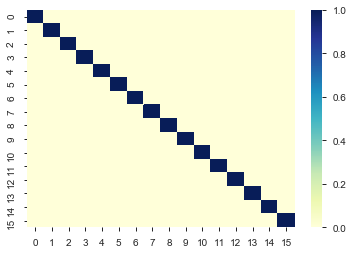

In [111]:
plt.plot(figsize=(25,25))
sns.heatmap(spect_df_pca_cor, annot=False, cmap="YlGnBu")
plt.show()

In [132]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

# instantiate model
pca_logreg = LogisticRegression(class_weight='balanced')


# fit model
pca_logreg.fit(spect_df_pca, spectf_df['target'])


# print("Time required to train a Logistic Regression after PCA: ", training_time)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [133]:
spectf_df['target'].shape

(187,)

In [126]:
spect_df_pca.shape

(187, 16)

In [128]:
spect_test_pca.shape

(187, 16)

In [134]:
y_predict = pca_logreg.predict(spect_test_pca)

In [135]:
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [136]:
metrics.accuracy_score(spectf_df['target'], y_predict)

1.0

In [137]:
print(metrics.classification_report(spectf_df['target'],y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00       172

   micro avg       1.00      1.00      1.00       187
   macro avg       1.00      1.00      1.00       187
weighted avg       1.00      1.00      1.00       187



In [138]:
print(metrics.confusion_matrix(spectf_df['target'],y_predict))

[[ 15   0]
 [  0 172]]
